# Constructing Glycolysis

Based on Chapter 10 of <cite data-cite="Pal11">Systems Biology: Simulation of Dynamic Network States</cite>

To construct a model of glycolysis, first we import **MASSpy** and other essential packages. Constants used throughout the notebook are also defined.

In [1]:
from os import path

import matplotlib.pyplot as plt

from cobra import DictList

from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

mass_config = MassConfiguration()

## Model Construction 

The first step of creating a model of glycolysis is to define the `MassModel`. 

In [2]:
glycolysis = MassModel("Glycolysis")

Academic license - for non-commercial use only


### Metabolites

The next step is to define all of the metabolites using the `MassMetabolite` object. Some considerations for this step include the following:

1. It is important to use a clear and consistent format for identifiers and names when defining the `MassMetabolite` objects for various reasons, some of which include improvements to model clarity and utility, assurance of unique identifiers (required to add metabolites to the model), and consistency when collaborating and communicating with others. 


2. In order to ensure our model is physiologically accurate, it is important to provide the `formula` argument with a string representing the chemical formula for each metabolite, and the `charge` argument with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). These attributes can always be set later if necessary using the `formula` and `charge` attribute set methods.


3. To indicate that the cytosol is the cellular compartment in which the reactions occur, the string "c" is provided to the `compartment` argument.

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 20 metabolites inside the cytosol compartment. 

In [3]:
glc__D_c = MassMetabolite(
    "glc__D_c",
    name="D-Glucose",
    formula="C6H12O6",
    charge=0,
    compartment="c",
    fixed=False)

g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

fdp_c = MassMetabolite(
    "fdp_c",
    name="D-Fructose 1,6-bisphosphate",
    formula="C6H10O12P2",
    charge=-4,
    compartment="c",
    fixed=False)

dhap_c = MassMetabolite(
    "dhap_c",
    name="Dihydroxyacetone phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

_13dpg_c = MassMetabolite(
    "_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c",
    fixed=False)

_3pg_c = MassMetabolite(
    "_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

_2pg_c = MassMetabolite(
    "_2pg_c",
    name="D-Glycerate 2-phosphate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

pep_c = MassMetabolite(
    "pep_c",
    name="Phosphoenolpyruvate",
    formula="C3H2O6P",
    charge=-3,
    compartment="c",
    fixed=False)

pyr_c = MassMetabolite(
    "pyr_c",
    name="Pyruvate",
    formula="C3H3O3",
    charge=-1,
    compartment="c",
    fixed=False)

lac__L_c = MassMetabolite(
    "lac__L_c",
    name="L-Lactate",
    formula="C3H5O3",
    charge=-1,
    compartment="c",
    fixed=False)

nad_c = MassMetabolite(
    "nad_c",
    name="Nicotinamide adenine dinucleotide",
    formula="[NAD]-C21H26N7O14P2",
    charge=-1,
    compartment="c",
    fixed=False)

nadh_c = MassMetabolite(
    "nadh_c",
    name="Nicotinamide adenine dinucleotide - reduced",
    formula="[NAD]-C21H27N7O14P2",
    charge=-2,
    compartment="c",
    fixed=False)

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c",
    fixed=False)

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c",
    fixed=False)

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c",
    fixed=False)

pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

### Reactions

Once all of the `MassMetabolite` objects for each metabolite, the next step is to define all of the reactions that occur and their stoichiometry.

1. As with the metabolites, it is also important to use a clear and consistent format for identifiers and names when defining when defining the `MassReaction` objects.


2. To make this model useful for integration with other models, it is important to provide a string to the `subsystem` argument. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model through the `subsystem` attribute


3. After the creation of each `MassReaction` object, the metabolites are added to the reaction using a dictionary where keys are the `MassMetabolite` objects and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 14 reactions occuring inside the cytosol compartment.

In [4]:
HEX1 = MassReaction(
    "HEX1",
    name="Hexokinase (D-glucose:ATP)",
    subsystem=glycolysis.id,
    reversible=True)
HEX1.add_metabolites({
    glc__D_c: -1,
    atp_c: -1,
    adp_c: 1,
    g6p_c: 1,
    h_c: 1})

PGI = MassReaction(
    "PGI",
    name="Glucose-6-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
PGI.add_metabolites({
    g6p_c: -1,
    f6p_c: 1})

PFK = MassReaction(
    "PFK",
    name="Phosphofructokinase",
    subsystem=glycolysis.id,
    reversible=True)
PFK.add_metabolites({
    f6p_c: -1,
    atp_c: -1,
    fdp_c: 1,
    adp_c: 1,
    h_c: 1})

FBA = MassReaction(
    "FBA",
    name="Fructose-bisphosphate aldolase",
    subsystem=glycolysis.id,
    reversible=True)
FBA.add_metabolites({
    fdp_c: -1,
    dhap_c: 1,
    g3p_c: 1})

TPI = MassReaction(
    "TPI",
    name="Triose-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
TPI.add_metabolites({
    dhap_c: -1,
    g3p_c: 1})

GAPD = MassReaction(
    "GAPD",
    name="Glyceraldehyde-3-phosphate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
GAPD.add_metabolites({
    g3p_c: -1,
    nad_c: -1,
    pi_c: -1,
    _13dpg_c: 1,
    h_c: 1,
    nadh_c: 1})

PGK = MassReaction(
    "PGK",
    name="Phosphoglycerate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PGK.add_metabolites({
    _13dpg_c: -1,
    adp_c: -1,
    _3pg_c: 1,
    atp_c: 1})

PGM = MassReaction(
    "PGM",
    name="Phosphoglycerate mutase",
    subsystem=glycolysis.id,
    reversible=True)
PGM.add_metabolites({
    _3pg_c: -1,
    _2pg_c: 1})

ENO = MassReaction(
    "ENO",
    name="Enolase",
    subsystem=glycolysis.id,
    reversible=True)
ENO.add_metabolites({
    _2pg_c: -1,
    h2o_c: 1,
    pep_c: 1})

PYK = MassReaction(
    "PYK",
    name="Pyruvate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PYK.add_metabolites({
    pep_c: -1,
    h_c: -1,
    adp_c: -1,
    atp_c: 1,
    pyr_c: 1})

LDH_L = MassReaction(
    "LDH_L",
    name="L-lactate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
LDH_L.add_metabolites({
    h_c: -1,
    nadh_c: -1,
    pyr_c: -1,
    lac__L_c: 1,
    nad_c: 1})

ADK1 = MassReaction(
    "ADK1",
    name="Adenylate kinase",
    subsystem="Misc.",
    reversible=True)
ADK1.add_metabolites({
    adp_c: -2,
    amp_c: 1,
    atp_c: 1})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Pseudoreaction",
    reversible=False)
ATPM.add_metabolites({
    atp_c: -1,
    h2o_c: -1,
    adp_c: 1,
    h_c: 1,
    pi_c: 1})

DM_nadh = MassReaction(
    "DM_nadh",
    name="Demand NADH",
    subsystem="Pseudoreaction",
    reversible=False)
DM_nadh.add_metabolites({
    nadh_c: -1,
    nad_c: 1,
    h_c: 1})

After generating the reactions, all reactions are added to the model through the `MassModel.add_reactions` class method. Adding the `MassReaction` objects will also add their associated `MassMetabolite` objects if they have not already been added to the model. 

In [5]:
glycolysis.add_reactions([
    HEX1, PGI, PFK, FBA, TPI, GAPD, PGK,
    PGM, ENO, PYK, LDH_L, ADK1, ATPM, DM_nadh])

for reaction in glycolysis.reactions:
    print(reaction)

HEX1: atp_c + glc__D_c <=> adp_c + g6p_c + h_c
PGI: g6p_c <=> f6p_c
PFK: atp_c + f6p_c <=> adp_c + fdp_c + h_c
FBA: fdp_c <=> dhap_c + g3p_c
TPI: dhap_c <=> g3p_c
GAPD: g3p_c + nad_c + pi_c <=> _13dpg_c + h_c + nadh_c
PGK: _13dpg_c + adp_c <=> _3pg_c + atp_c
PGM: _3pg_c <=> _2pg_c
ENO: _2pg_c <=> h2o_c + pep_c
PYK: adp_c + h_c + pep_c <=> atp_c + pyr_c
LDH_L: h_c + nadh_c + pyr_c <=> lac__L_c + nad_c
ADK1: 2 adp_c <=> amp_c + atp_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
DM_nadh: nadh_c --> h_c + nad_c


### Boundary reactions

After generating the reactions, the next step is to add the boundary reactions and boundary conditions (the concentrations of the boundary 'metabolites' of the system). This can easily be done using the `MassModel.add_boundary` method. With the generation of the boundary reactions, the system becomes an open system, allowing for the flow of mass through the biochemical pathways of the model.

Once added, the model will be able to return the boundary conditions as a dictionary through the `MassModel.boundary_conditions` attribute 

In this model, there are 7 boundary reactions that must be defined.

All boundary reactions are originally created with the metabolite as the reactant. However, there are times where it would be preferable to represent the metabolite as the product. For these situtations, the `MassReaction.reverse_stoichiometry` method can be used with its `inplace` argument to create a new `MassReaction` or simply reverse the stoichiometry for the current `MassReaction.` 

In [6]:
SK_glc__D_c = glycolysis.add_boundary(
    metabolite=glc__D_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_glc__D_c.reverse_stoichiometry(inplace=True)

SK_lac__L_c = glycolysis.add_boundary(
    metabolite=lac__L_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_pyr_c = glycolysis.add_boundary(
    metabolite=pyr_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=0.06)

SK_h_c = glycolysis.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = glycolysis.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_amp_c.reverse_stoichiometry(inplace=True)

DM_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in glycolysis.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = glycolysis.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
SK_glc__D_c:  <=> glc__D_c
glc__D_b: 1.0

SK_lac__L_c: lac__L_c <=> 
lac__L_b: 1.0

SK_pyr_c: pyr_c <=> 
pyr_b: 0.06

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_amp_c:  <=> amp_c
amp_b: 1.0

DM_amp_c: amp_c --> 
amp_b: 1.0



### Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal objects, one can use `cobra.DictList` containers and the `DictList.get_by_any` method with the list of object identifiers in the desirable order. To ensure all objects are still present and not forgotten in the model, a small QA check is also performed. 

In [7]:
new_metabolite_order = [
    "glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c",
    "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c",
    "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c",
    "adp_c", "atp_c", "pi_c", "h_c", "h2o_c"]

if len(glycolysis.metabolites) == len(new_metabolite_order):
    glycolysis.metabolites = DictList(
        glycolysis.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = [
    "HEX1", "PGI", "PFK", "FBA", "TPI",
    "GAPD", "PGK", "PGM", "ENO", "PYK",
    "LDH_L", "DM_amp_c", "ADK1", "SK_pyr_c",
    "SK_lac__L_c", "ATPM", "DM_nadh", "SK_glc__D_c",
    "SK_amp_c", "SK_h_c", "SK_h2o_c"]

if len(glycolysis.reactions) == len(new_reaction_order):
    glycolysis.reactions = DictList(
        glycolysis.reactions.get_by_any(new_reaction_order))
    
glycolysis.update_S(array_type="DataFrame", dtype=int)

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
glc__D_c,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
g6p_c,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f6p_c,0,1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fdp_c,0,0,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dhap_c,0,0,0,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g3p_c,0,0,0,1,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_13dpg_c,0,0,0,0,0,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_3pg_c,0,0,0,0,0,0,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
_2pg_c,0,0,0,0,0,0,0,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
pep_c,0,0,0,0,0,0,0,0,1,-1,...,0,0,0,0,0,0,0,0,0,0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. 

Pathways are obtained using the minspan package (https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. For this model, flux and concentration data are obtained from the historical human red blood cell (RBC) metabolic model (Heinrich 1977, Jamshidi 2002, Joshi 1988, Joshi 1990, Joshi 1989-II). 

From the literature, it is known that:

1. A typical uptake rate of the RBC of glucose is about 1.12 mM/hr. 
2. Based on experimental data, the steady state load on NADH is set at 20% of the glucose uptake rate, or $0.2 * 1.12 = 0.244$. 
3. The synthesis rate of AMP is measured to be 0.014 mM/hr. 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [8]:
minspan_paths = [
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
glycolysis.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_glc__D_c: 1.12,
        DM_nadh: .2 * 1.12,
        DM_amp_c: 0.014},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in glycolysis.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_HEX1: 1.120000
v_PGI: 1.120000
v_PFK: 1.120000
v_FBA: 1.120000
v_TPI: 1.120000
v_GAPD: 2.240000
v_PGK: 2.240000
v_PGM: 2.240000
v_ENO: 2.240000
v_PYK: 2.240000
v_LDH_L: 2.016000
v_DM_amp_c: 0.014000
v_ADK1: 0.000000
v_SK_pyr_c: 0.224000
v_SK_lac__L_c: 2.016000
v_ATPM: 2.240000
v_DM_nadh: 0.224000
v_SK_glc__D_c: 1.120000
v_SK_amp_c: 0.014000
v_SK_h_c: 2.688000
v_SK_h2o_c: 0.000000


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. These concentrations are also treated as the initial conditions required to integrate and simulate the model's ordinary differential equations (ODEs). The metabolite concentrations are added to each individual metabolite using the `MassMetabolite.initial_condition` (alias: `MassMetabolite.ic`) attribute setter methods. Once added, the model will be able to return the initial conditions as a dictionary through the `MassModel.initial_conditions` attribute.

In [9]:
glc__D_c.ic = 1.0
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
fdp_c.ic = 0.0146
g3p_c.ic = 0.00728
dhap_c.ic = 0.16
_13dpg_c.ic = 0.000243
_3pg_c.ic = 0.0773
_2pg_c.ic = 0.0113
pep_c.ic = 0.017
pyr_c.ic = 0.060301
lac__L_c.ic = 1.36
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 0.0867281
h_c.ic = 0.0000899757
nad_c.ic = 0.0589
nadh_c.ic = 0.0301
pi_c.ic = 2.5
h2o_c.ic = 1.0

print("Initial Conditions\n------------------")
for metabolite, ic_value in glycolysis.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0


### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants are defined using the `MassReaction.equilibrium_constant` (alias: `MassReaction.Keq`) setter method. 

In [10]:
HEX1.Keq = 850
PGI.Keq = 0.41
PFK.Keq = 310
FBA.Keq = 0.082
TPI.Keq = 0.0571429
GAPD.Keq = 0.0179
PGK.Keq = 1800
PGM.Keq = 0.147059
ENO.Keq = 1.69492
PYK.Keq = 363000
LDH_L.Keq = 26300
ADK1.Keq = 1.65

SK_glc__D_c.Keq = mass_config.irreversible_Keq
SK_lac__L_c.Keq = 1
SK_pyr_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_amp_c.Keq = mass_config.irreversible_Keq

print("Equilibrium Constants\n---------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_HEX1: 850
Keq_PGI: 0.41
Keq_PFK: 310
Keq_FBA: 0.082
Keq_TPI: 0.0571429
Keq_GAPD: 0.0179
Keq_PGK: 1800
Keq_PGM: 0.147059
Keq_ENO: 1.69492
Keq_PYK: 363000
Keq_LDH_L: 26300
Keq_DM_amp_c: inf
Keq_ADK1: 1.65
Keq_SK_pyr_c: 1
Keq_SK_lac__L_c: 1
Keq_ATPM: inf
Keq_DM_nadh: inf
Keq_SK_glc__D_c: inf
Keq_SK_amp_c: inf
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the `MassModel.calculate_PERCs` method.

In [11]:
glycolysis.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

Forward Rate Constants
----------------------
kf_HEX1: 0.700007
kf_PGI: 3644.444444
kf_PFK: 35.368784
kf_FBA: 2834.567901
kf_TPI: 34.355728
kf_GAPD: 3376.749242
kf_PGK: 1273531.269741
kf_PGM: 4868.589299
kf_ENO: 1763.740525
kf_PYK: 454.385552
kf_LDH_L: 1112.573989
kf_DM_amp_c: 0.161424
kf_ADK1: 100000.000000
kf_SK_pyr_c: 744.186047
kf_SK_lac__L_c: 5.600000
kf_ATPM: 1.400000
kf_DM_nadh: 7.441860
kf_SK_glc__D_c: 1.120000
kf_SK_amp_c: 0.014000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


## QC/QA Model

Before simulating the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the `qcqa_model` function from the `mass.util.qcqa`</td> submodule is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

Generally, pseudoreactions (e.g. boundary exchanges, sinks, demands) are not elementally balanced. The `qcqa_model` function does not include elemental balancing of boundary reactions. 

However, some models contain pseudoreactions reprsenting a simplified mechanism, and show up in the returned report. The elemental imbalance of these pseudoreactions is therefore expected in certain reaction and should not be a cause for concern. 

In this model of glycolysis, the NADH demand reaction is a simplified pseudoreaction that generates electrons for certain redox processes and is not expected to be balanced.

In [12]:
qcqa_model(glycolysis, parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: Glycolysis                         │
│ SIMULATABLE: True;                           │
│ NUMERICALLY CONSISTENT: True                 │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ---------------------------------            │
│ DM_nadh: {charge: 2.0} unbalanced            │
│ ============================================ │
╘══════════════════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and Model Validation 

To find the steady state of the model and perform simulations, the model must first be loaded into a `Simulation`. In order to load a model into a `Simulation`, the model must be simulatable, meaning there are no missing numerical values that would prevent the integration of the ODEs that comprise the model. The `verbose` argument can be used while loading a model to produce a message indicating the successful loading of a model, or why a model could not load.

Once loaded into a `Simulation`, the `find_steady_state` method can be used with the `update_values` argument in order to update the initial conditions and fluxes of the model to a steady state (if necessary). The model can be simulated using the `simulate` method by passing the model to simulate, and a tuple containing the start time and the end time. The number of time points can also be included, but is optional.

After a successful simulation, two `MassSolution` objects are returned. The first `MassSolution` contains the concentration results of the simulation, and the second contains the flux results of the simulation. 

To visually validate the steady state of the model, concentration and flux solutions can be plotted using the `plot_time_profile` function from `mass.visualization`</td>. Alternatively, the `MassSolution.view_time_profile` property can be used to quickly generate a time profile for the results.

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


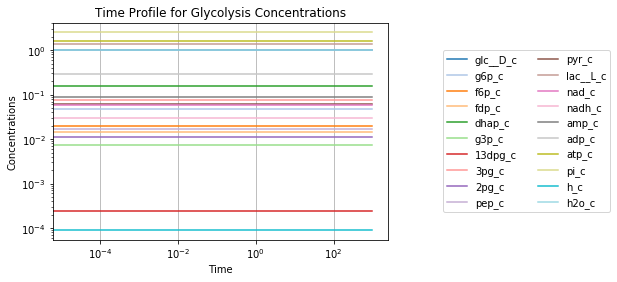

In [13]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0, 1e3, 1e4 + 1))
# Quickly render and display time profiles
conc_sol.view_time_profile

### Storing information and references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the `MassModel.compartments` attribute.

In [14]:
glycolysis.compartments = {"c": "Cytosol"}
print(glycolysis.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount and "Liters" for volume (giving a concentration unit of 'Millimolar'), and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the `MassModel.units` attribute.

The `MassModel.units` is a `cobra.DictList` that contains only `UnitDefinition` objects from the `mass.core.unit` submodule. 

Each `UnitDefinition` is created from `Unit` objects representing the base units that comprise the `UnitDefinition`. These `Units` are stored in the `list_of_units` attribute. Pre-built units can be viewed using the `print_defined_unit_values` function from the `mass.core.unit`</td> submodule. Alternatively, custom units can also be created using the `UnitDefinition.create_unit` function.

For more information about units, please see the module docstring for `mass.core.unit` submodule.

__Note:__ It is important to note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [15]:
# Using pre-build units to define UnitDefinitions
concentration = UnitDefinition("mM", name="Millimolar", list_of_units=["millimole", "per_litre"])
time = UnitDefinition("hr", name="hour", list_of_units=["hour"])

# Add units to model
glycolysis.add_units([concentration, time])
print(glycolysis.units)

[<UnitDefinition Millimolar "mM" at 0x125d30ed0>, <UnitDefinition hour "hr" at 0x125d30c90>]


## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or as an ".sbml" (".xml") file using their repsective submodules in `mass.io`</td>.

To export the model, only the path to the directory and the name of the model need to be specified.

In [16]:
filepath = path.realpath(path.join("models", "SB2_" + glycolysis.id))

### Export using JSON

In [17]:
json.save_json_model(mass_model=glycolysis, filename=filepath + ".json")